## A4 Computational Code and Output
### Sean Meng 76349968

In [1]:
library(tidyverse, warn.conflicts = FALSE)
library(car)
library(patchwork)
library(ResourceSelection)
options(warn=-1)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some


ResourceSelection 0.3-6 	 2023-06-27



**Model Building**: Fit an initial logistic regression model with all  predictors.

**Diagnostic Check**: Box-Tidwell Test: A formal statistical test for assessing linearity in the logit for continuous variables. It involves creating interaction terms between the continuous predictors and their natural logarithm and then testing the significance of these terms.

**Model Selection**: Apply both forward and backward selection methods to identify the most significant predictors, guided by the AIC. It balances the model's complexity and the explanatory power.

**Validation**: Use cross-validation(10-fold) to assess the model's predictive performance and prevent overfitting. Dividing our 5110 observations into 10 folds ensures that each fold is large enough to be representative of the dataset's diversity while allowing every data point to contribute to both the training and validation process.

**The Goodness of Fit**: Hosmer-Lemeshow Test will be used. A non-significant result (p> 0.05) suggests a good fit that the model's predictions are not significantly different from the observed values.

**Interpretation**: Provide a detailed interpretation of the final selected model, indicating the influence of each factor on stroke risk.


### Read dataset from the website into R.

In [2]:
data<-read_csv('https://raw.githubusercontent.com/seanmeng2001/STAT301/main/healthcare-dataset-stroke-data.csv')
head(data)

Rows: 5110 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): gender, ever_married, work_type, Residence_type, bmi, smoking_status
dbl (6): id, age, hypertension, heart_disease, avg_glucose_level, stroke

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


id    gender age hypertension heart_disease ever_married work_type    
1  9046 Male   67  0            1             Yes          Private      
2 51676 Female 61  0            0             Yes          Self-employed
3 31112 Male   80  0            1             Yes          Private      
4 60182 Female 49  0            0             Yes          Private      
5  1665 Female 79  1            0             Yes          Self-employed
6 56669 Male   81  0            0             Yes          Private      
  Residence_type avg_glucose_level bmi  smoking_status  stroke
1 Urban          228.69            36.6 formerly smoked 1     
2 Rural          202.21            N/A  never smoked    1     
3 Rural          105.92            32.5 never smoked    1     
4 Urban          171.23            34.4 smokes          1     
5 Rural          174.12            24   never smoked    1     
6 Urban          186.21            29   formerly smoked 1

### Data Description:

The dataset chosen for this project comes from **Kaggle** and is focused on predicting the likelihood of a patient experiencing a stroke based on various parameters such as gender, age, health conditions, and smoking status. Each entry presents data for an individual patient. This dataset is of significant importance in light of the World Health Organization's (WHO) statement that strokes account for approximately 11% of total global deaths, making it the 2nd leading cause of death worldwide. By examining these critical parameters, the goal is to better understand and potentially mitigate the risk factors associated with strokes. The dataset can be accessed via the following link: 
https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset.


**Number of Observations:**  5110

**Number of Variables:** 12

**Variables Description:**

- **id** (Double): A unique identifier for each patient.

- **gender** (Character): Gender of the patient. It can be "Male", "Female", or "Other".

- **age** (Double): Age of the patient.

- **hypertension** (Double): Indicates the presence (1) or absence (0) of hypertension in the patient.

- **heart_disease** (Double): Indicates the presence (1) or absence (0) of any heart diseases in the patient.

- **ever_married** (Character): Whether the patient has ever been married. It can be "Yes" or "No".

- **work_type** (Character): Type of employment or occupation of the patient. The possible values are "children", "Govt_jov", "Never_worked", "Private", or "Self-employed".

- **Residence_type** (Character): Type of residence of the patient, either "Urban" or "Rural".

- **avg_glucose_level** (Double): Average glucose level in the patient's blood.

- **bmi** (Character): Body Mass Index of the patient.

- **smoking_status** (Character): Smoking status of the patient. It can be "formerly smoked", "never smoked", "smokes", or "Unknown". Unknown means that the information is unavailable for this patient."

- **stroke** (Double): Indicates if the patient had a stroke (1) or not (0).

This dataset has been compiled to provide insights into the potential risk factors and their relationship with stroke incidents. 

### Research Question:

**"How do various factors such as gender, age, hypertension, heart disease, marital status, employment type, residence, glucose levels, body mass index, and smoking habits influence the likelihood of a patient experiencing a stroke?"**

## Brief EDA:

### Data Clean:  
**All data** in this dataset are used in this research project since all variables seem like they might have associations with the response variable 'stroke'.  And it’s better to explore all the variables, then let the data choose which ones are useful.  
Clean and wrangle the data into a tidy format in following steps:

**1.** **Remove 'id'** column, the 'id' column is a simple enumeration of observations and holds no statistical meaning for our research, 'id' would not affect the 'stroke'.

**2.** **Converting Variables to Appropriate Data Types**  
The code converts several variables to factors, which is a necessary step for statistical modelling in R. Factors are used to represent categorical data, and by explicitly declaring variables such as gender, ever_married, work_type, Residence_type, and smoking_status as factors, the statistical models can correctly interpret these as categorical rather than continuous variables. The binary variables stroke, hypertension, and heart_disease are also converted to factors to ensure they are properly handled as categorical variables with two levels (0 and 1).

**3.** **NAs** in the BMI variable are replaced with the **mean BMI** of the non-missing data. This approach is taken to retain the full sample size, which preserves the power of the statistical analysis and avoids bias that could arise from simply excluding observations with missing data.   
(Imputing missing values with the mean is a common practice for dealing with missing numerical data when the assumption is that the missing values are randomly distributed.) 

**4. Check** for missing values. Ensure that the data is thoroughly cleansed of any missing values.

In [3]:
data <- data %>%
  select(-id) %>%
  mutate(across(c(gender, ever_married, work_type, Residence_type, smoking_status), as.factor),
         stroke = as.factor(stroke),  
         hypertension = as.factor(hypertension),
         heart_disease = as.factor(heart_disease),
         bmi = as.numeric(bmi),
         bmi = ifelse(is.na(bmi), mean(bmi, na.rm = TRUE), bmi))
sum(is.na(data))

[1] 0

In [4]:
set.seed(123)
# split data into training and test sets
training_stroke  = data %>%
  sample_frac(0.7)
nrow(training_stroke)

testing_stroke = data %>%
  setdiff(training_stroke)
nrow(testing_stroke)


[1] 3577

[1] 1533

## Visualization

Firstly, we will visualize the relationship between **continuous** variables('age', 'avg_glucose_level', 'bmi') and **'stroke'**.   
Secondly, we will visualize the relationship between **categorical** variables("gender", "hypertension", "heart_disease", "ever_married", "work_type", "Residence_type", "smoking_status") and **'stroke'**.  
Thirdly, we will combine both the boxplots and the bar charts into one high quality **combo plot** sharing the **common story**(relations with the same response variable 'stroke').

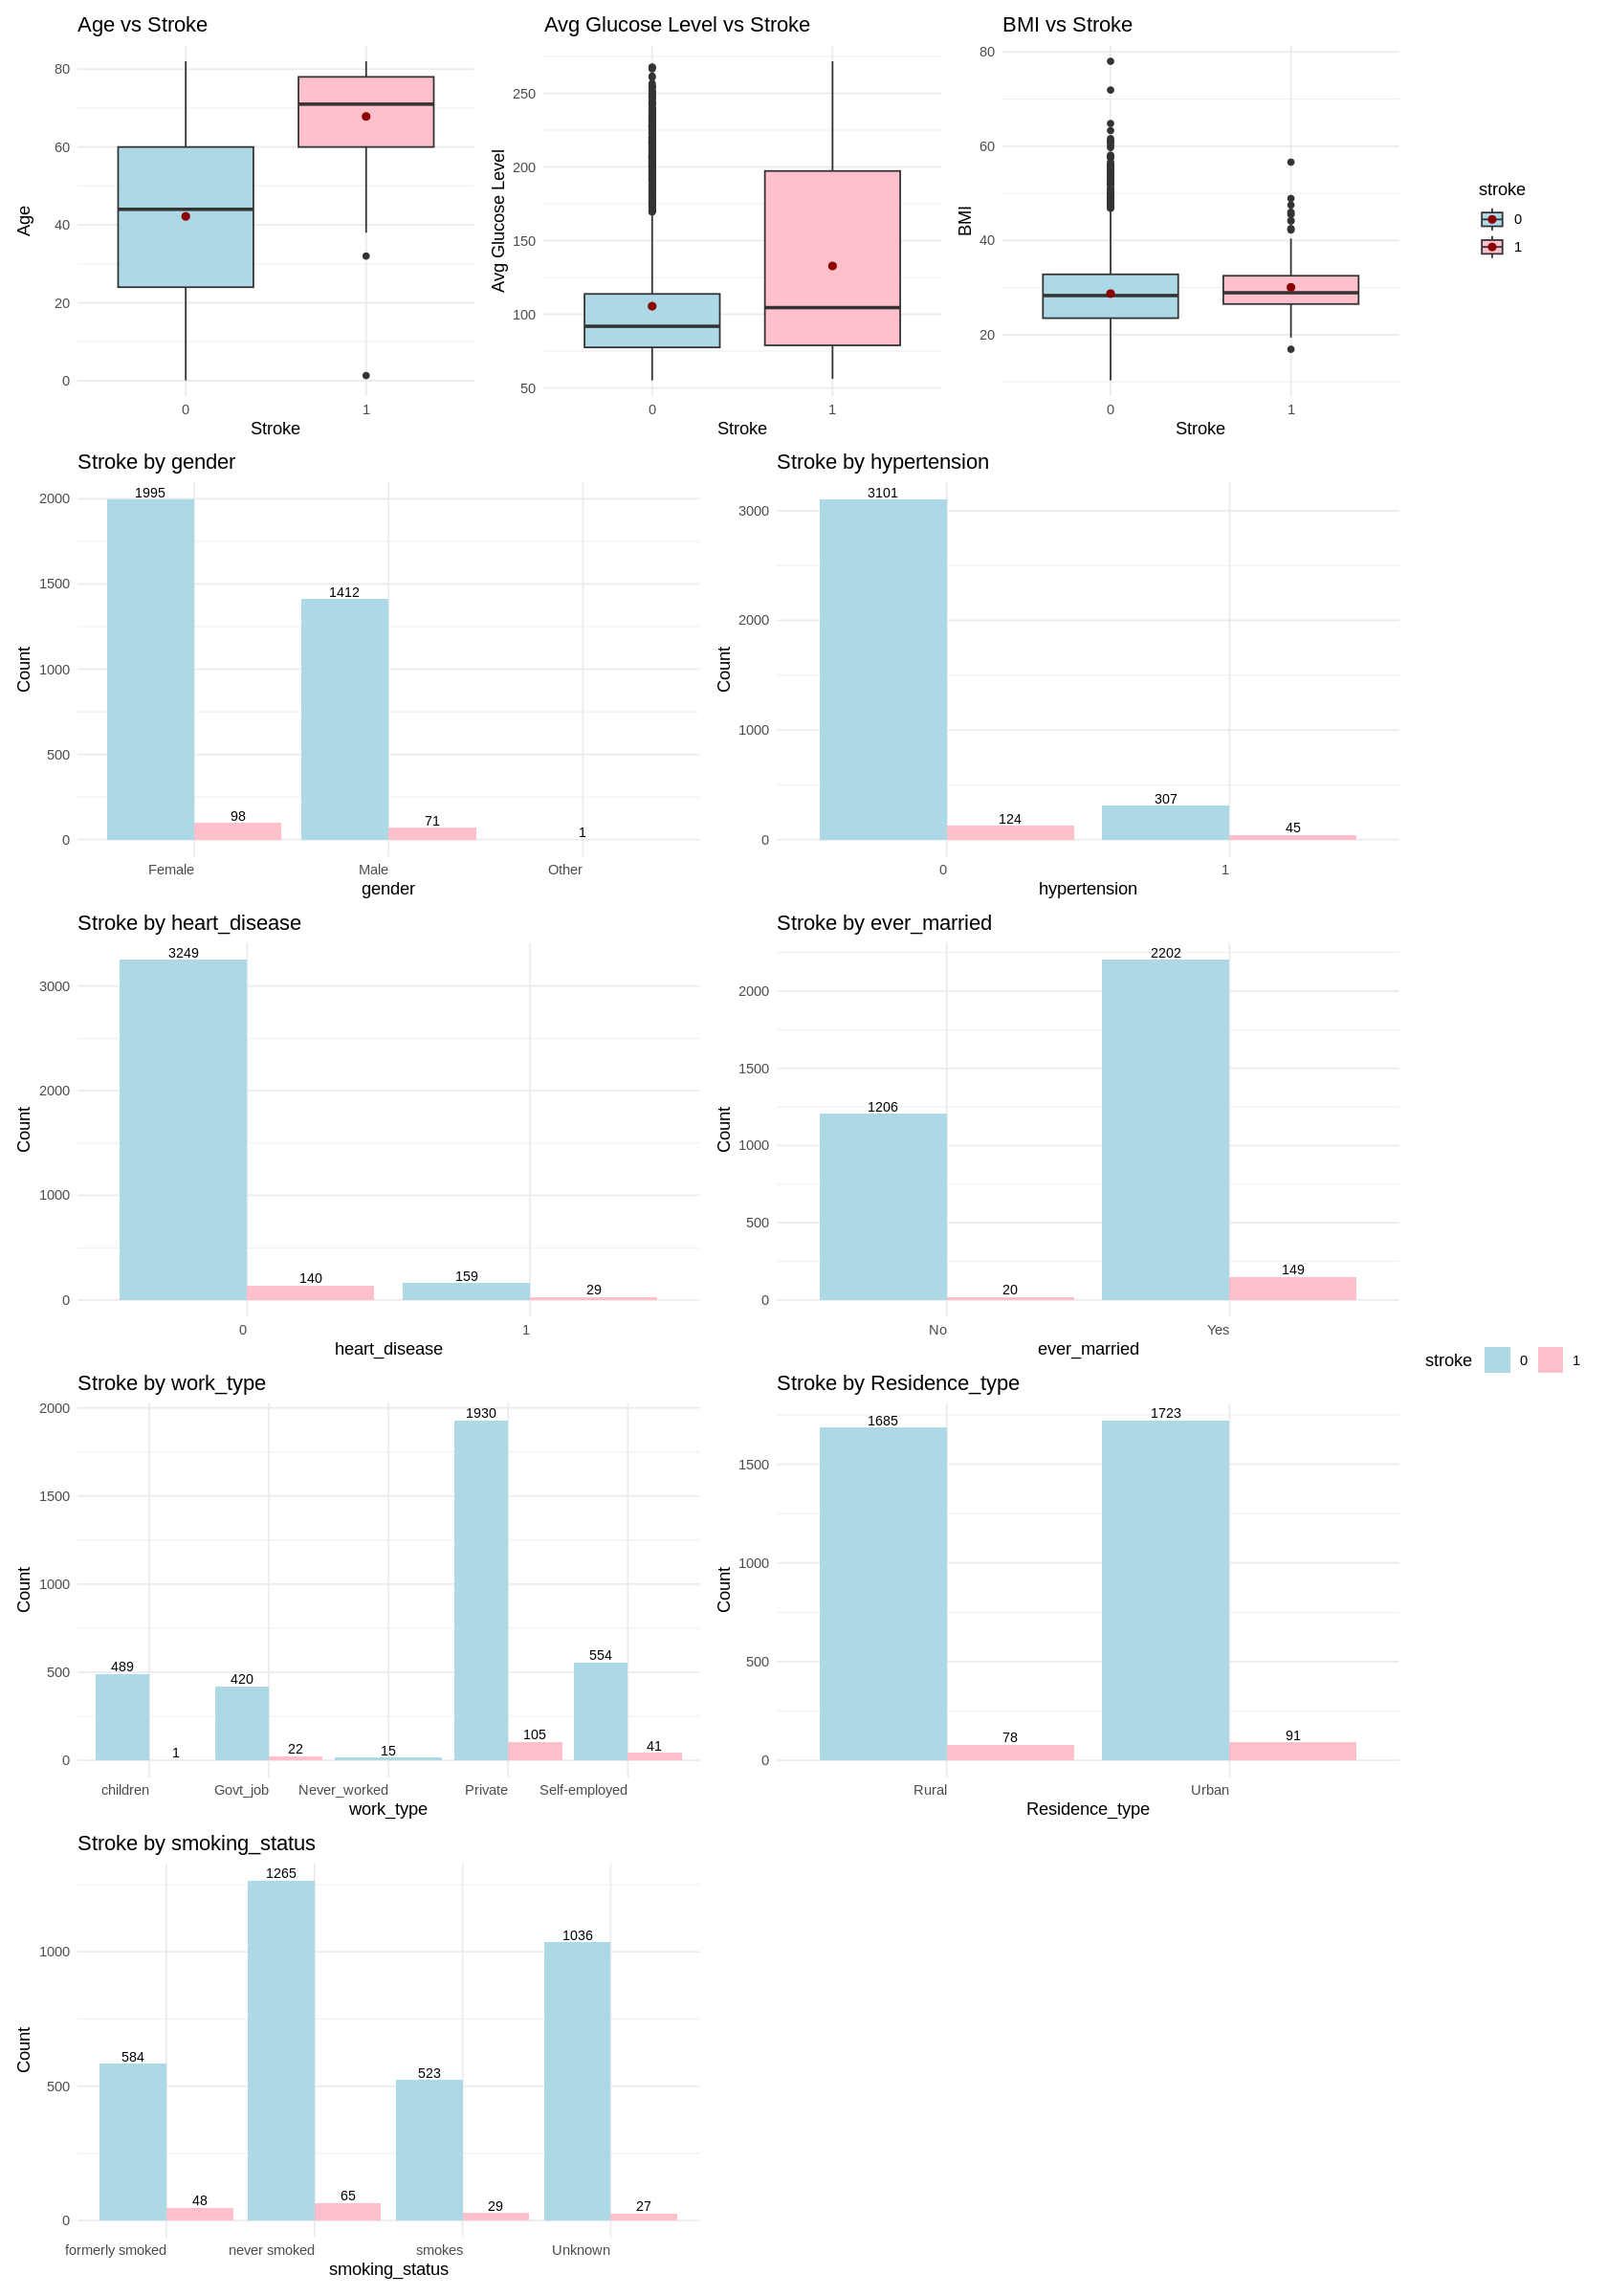

In [5]:
options(repr.plot.width = 14, repr.plot.height = 20)
# Boxplot for Age vs stroke
age_plot <- ggplot(training_stroke, aes(x =stroke, y = age, fill = stroke)) +
  geom_boxplot() +
  stat_summary(fun = mean, geom = "point", shape = 20, size = 3, color = "darkred") +
  labs(x = "Stroke", y = "Age", title = "Age vs Stroke") +
  theme_minimal() +
  scale_fill_manual(values = c("lightblue", "pink"))

# Boxplot for Avg_glucose_level vs stroke
glucose_plot <- ggplot(training_stroke, aes(x = stroke, y = avg_glucose_level, fill = stroke)) +
  geom_boxplot() +
  stat_summary(fun = mean, geom = "point", shape = 20, size = 3, color = "darkred") +
  labs(x = "Stroke", y = "Avg Glucose Level", title = "Avg Glucose Level vs Stroke") +
  theme_minimal() +
  scale_fill_manual(values = c("lightblue", "pink"))

# Boxplot for BMI vs stroke
bmi_plot <- ggplot(training_stroke, aes(x = stroke, y = bmi, fill = stroke)) +
  geom_boxplot() +
  stat_summary(fun = mean, geom = "point", shape = 20, size = 3, color = "darkred") +
  labs(x = "Stroke", y = "BMI", title = "BMI vs Stroke") +
  theme_minimal() +
  scale_fill_manual(values = c("lightblue", "pink"))

# Combine the boxplots into one composite plot
boxplot_composite <- (age_plot | glucose_plot | bmi_plot) +
  plot_layout(guides = 'collect') & theme(legend.position = 'right')


# Bar charts for categorical variables("gender", "hypertension", "heart_disease", "ever_married", "work_type", "Residence_type", "smoking_status") vs stroke
categorical_variables <- c("gender", "hypertension", "heart_disease", "ever_married", "work_type", "Residence_type", "smoking_status")
plot_categorical_variable <- function(data, variable_name, response_variable) {
  ggplot(training_stroke, aes_string(x = variable_name, fill = response_variable)) + 
    geom_bar(position = "dodge") +
    geom_text(stat='count', aes(label=..count..), position=position_dodge(width=0.9), vjust=-0.25, size=3) +
    scale_fill_manual(values = c("0" = "lightblue", "1" = "pink")) + 
    labs(title = paste("Stroke by", variable_name), x = variable_name, y = "Count") +
    theme_minimal() +
    theme(axis.text.x = element_text( hjust = 1), 
          legend.position = "bottom") 
}

bar_plots_list <- list()

for (var in categorical_variables) {
  bar_plots_list[[var]] <- plot_categorical_variable(data, var, "stroke")
}

bar_plot_composite <- wrap_plots(bar_plots_list, ncol = 2) +
  plot_layout(guides = 'collect')

 
# Combine the boxplots and bar charts together into 
combo_plot <- boxplot_composite / bar_plot_composite
combo_plot <- combo_plot + 
              plot_layout(heights = c(1, 5))

print(combo_plot)


### Briefly interpretation of the visualization:
Variables are likely associated with stroke: age, average glucose level, BMI, Hypertension, Heart Disease, Work Type, Smoking Status, ever_married( may confound with age)

## Methods

### Logistic Regression with Stepwise Model Selection

### Why is this method appropriate?
**Logistic regression** is suitable for our binary outcome (stroke occurrence). It can handle a mix of categorical and continuous variables, making it suitable for analyzing how different factors contribute to stroke risk. This method is excellent in determining the strength and direction of associations between various predictors and the likelihood of experiencing a stroke. By using logistic regression, we can estimate the odds of stroke occurrence in relation to individual predictors, providing valuable insights into how different factors affect stroke risk.

**The stepwise selection method** is chosen for its ability to effectively balance model complexity and fit. It combines forward and backward methods, starting by adding significant variables and then removing the less significant ones.

## Assumptions for Logistic Regression:
**Binary Response**: The response variable, stroke occurrence, is dichotomous(two possible responses), which meets the binary response requirement.

**Independence**: We assume that each patient's data is independent of another's, a prerequisite we will ensure during data collection.

**Variance Structure**: Logistic regression assumes the variance of the response variable is a function of its mean, suitable for our binary outcome.

**Linearity**: The logit is assumed to have a linear relationship with independent variables, and we will use empirical logit plots for continuous predictors to assess the linearity assumption.

## Plan

**Model Building**: Fit an initial logistic regression model with all  predictors.

**Diagnostic Check**: Empirical logit plots are used to check the linearity assumption for continuous variables. If non-linearity is indicated, methods like log transformation and polynomial terms will be used to address non-linearity since they are useful for handling skewed data.

**Model Selection**: Apply both forward and backward selection methods to identify the most significant predictors, guided by the AIC. It balances the model's complexity and the explanatory power.

**Validation**: Use cross-validation(10-fold) to assess the model's predictive performance and prevent overfitting. Dividing our 5110 observations into 10 folds ensures that each fold is large enough to be representative of the dataset's diversity while allowing every data point to contribute to both the training and validation process.

**The Goodness of Fit**: Hosmer-Lemeshow Test will be used. A non-significant result (p> 0.05) suggests a good fit that the model's predictions are not significantly different from the observed values.

**Interpretation**: Provide a detailed interpretation of the final selected model, indicating the influence of each factor on stroke risk.


## Potential Limitations & Weaknesses

**Biases in Data Collection**:
Biases in data collection such as selection bias or missing data would impact the model's validity and generalizability.

**Risk of Overfitting**:
Stepwise model selection with a large set of predictors may cause overfitting.

**Subjectivity of Plots**:
The interpretation of empirical logit plots can be subjective. Non-linear relationships might be misinterpreted.

**Outliers**:
If there are outliers present, they might skew the results and impact the interpretation of the data.

**Confounders**: If confounders are not correctly addressed, they will bias the estimated impact of the predictors on the outcome.

## Implementation of a proposed model

#### Model Building: 
Fit the initial logistic regression model with all predictors

In [6]:
logit_model <- glm(stroke ~ .,family = binomial(), data = training_stroke)

#### Diagnostic Check:  
Use Box-Tidwell Test to check the assumption of Linearity.

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


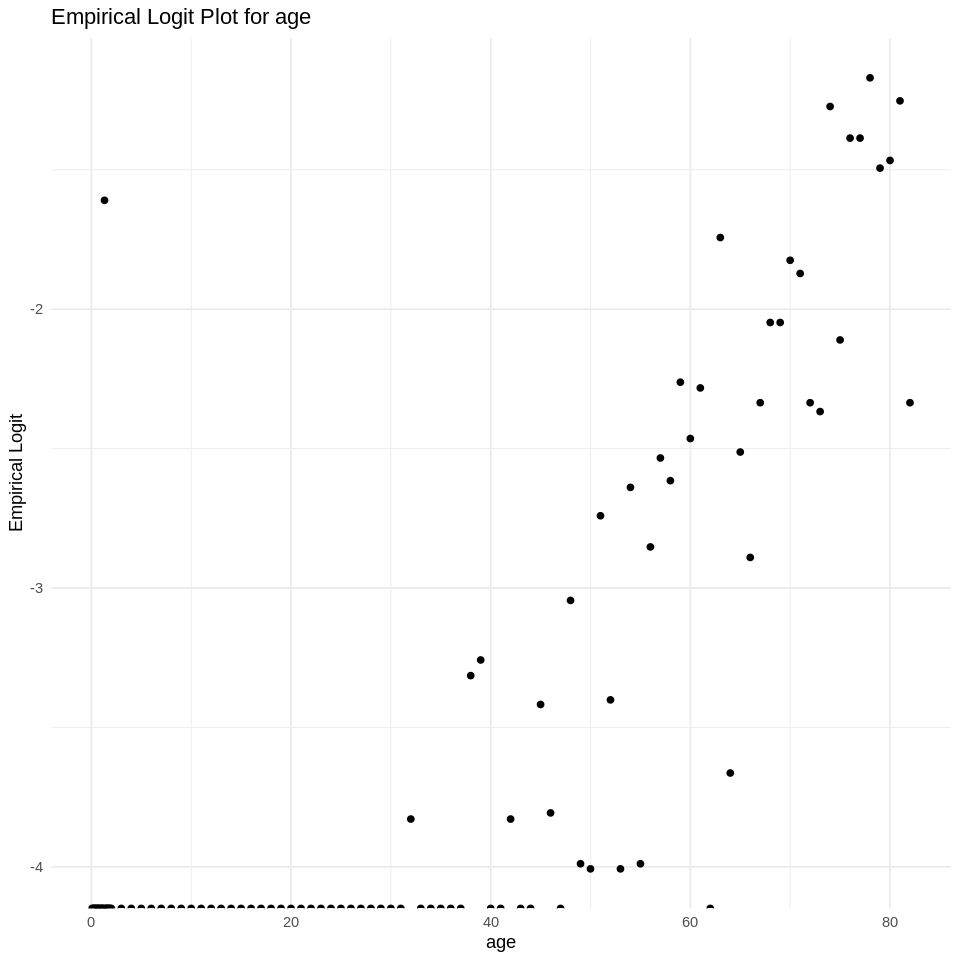

`geom_smooth()` using formula = 'y ~ x'


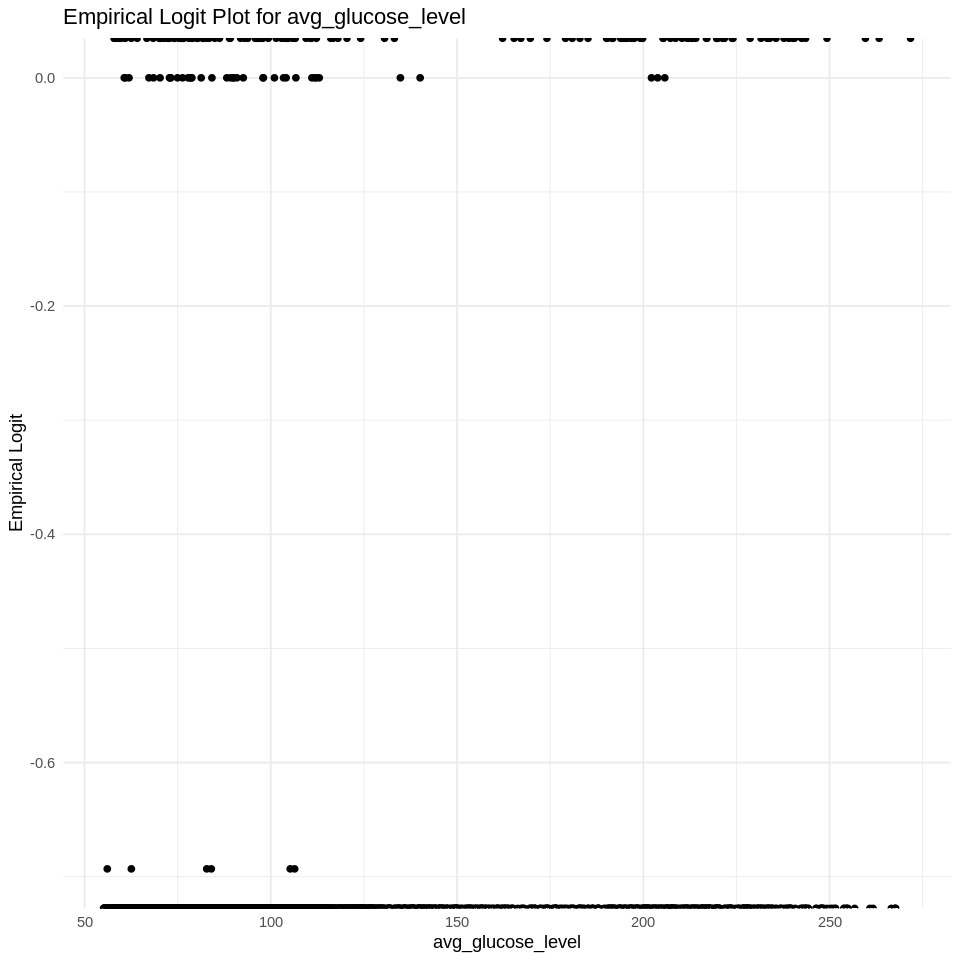

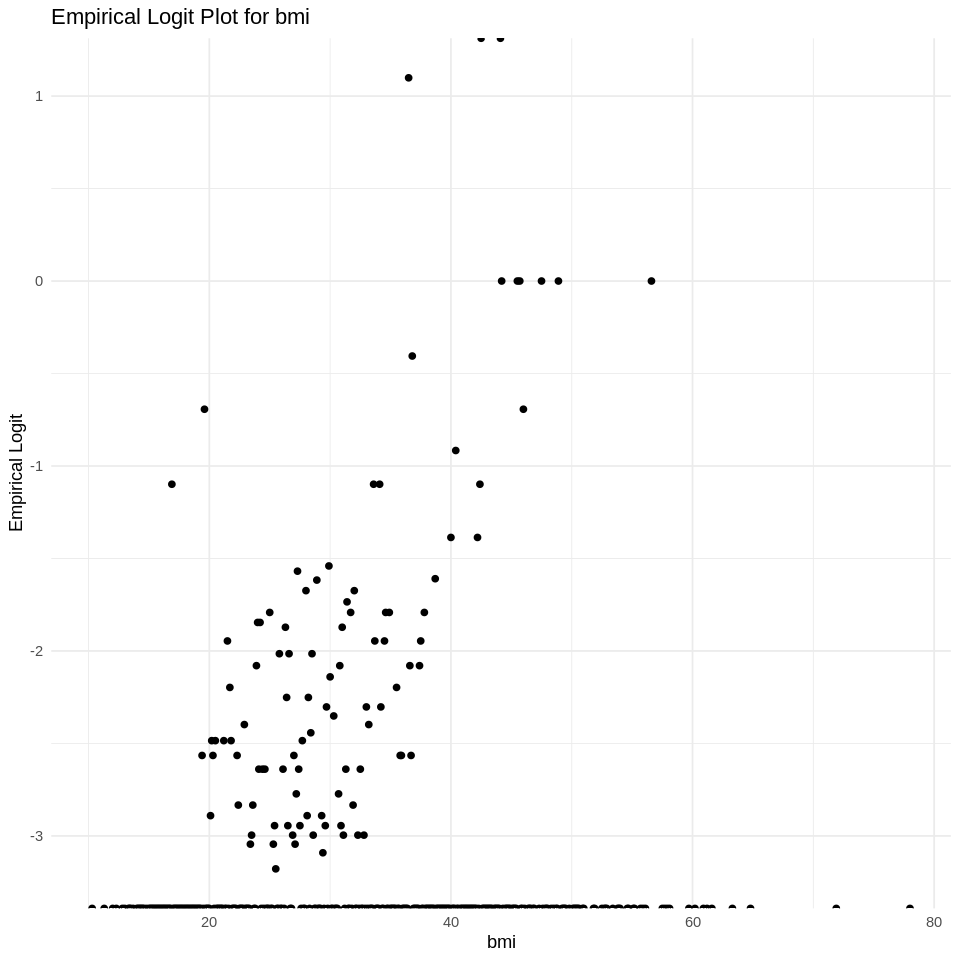

In [19]:
options(repr.plot.width = 8, repr.plot.height = 8)

plot_empirical_logit <- function(data, continuous_var, response_var) {
  data_summary <- data %>%
    group_by({{ continuous_var }}) %>%
    summarise(Stroke_Prob = mean({{ response_var }} == 1), .groups = 'drop') %>%
    mutate(Empirical_Logit = log(Stroke_Prob / (1 - Stroke_Prob)))

  ggplot(data_summary, aes(x = {{ continuous_var }}, y = Empirical_Logit)) +
    geom_point() +
    geom_smooth(method = "glm", method.args = list(family = "binomial"), se = FALSE) +
    labs(title = paste("Empirical Logit Plot for", deparse(substitute(continuous_var))),
         x = deparse(substitute(continuous_var)),
         y = "Empirical Logit") +
    theme_minimal()
}

plot_empirical_logit(training_stroke, age, stroke)
plot_empirical_logit(training_stroke, avg_glucose_level, stroke)
plot_empirical_logit(training_stroke, bmi, stroke)



#### Model Selection:
Apply the step function to identify the most significant predictors.

In [20]:
step(logit_model,direction="both")

Start:  AIC=1114.46
stroke ~ gender + age + hypertension + heart_disease + ever_married + 
    work_type + Residence_type + avg_glucose_level + bmi + smoking_status

                    Df Deviance    AIC
- gender             2   1080.5 1110.5
- smoking_status     3   1082.6 1110.6
- bmi                1   1080.5 1112.5
- Residence_type     1   1080.8 1112.8
- ever_married       1   1080.9 1112.9
- heart_disease      1   1081.4 1113.4
<none>                   1080.5 1114.5
- work_type          4   1090.1 1116.1
- hypertension       1   1085.2 1117.2
- avg_glucose_level  1   1089.4 1121.4
- age                1   1224.6 1256.6

Step:  AIC=1110.47
stroke ~ age + hypertension + heart_disease + ever_married + 
    work_type + Residence_type + avg_glucose_level + bmi + smoking_status

                    Df Deviance    AIC
- smoking_status     3   1082.6 1106.6
- bmi                1   1080.5 1108.5
- Residence_type     1   1080.8 1108.8
- ever_married       1   1080.9 1108.9
- heart_diseas


Call:  glm(formula = stroke ~ age + hypertension + work_type + avg_glucose_level, 
    family = binomial(), data = training_stroke)

Coefficients:
           (Intercept)                     age           hypertension1  
              -7.21498                 0.07626                 0.44984  
     work_typeGovt_job   work_typeNever_worked        work_typePrivate  
              -0.88098                -9.98351                -0.61653  
work_typeSelf-employed       avg_glucose_level  
              -1.23658                 0.00447  

Degrees of Freedom: 3576 Total (i.e. Null);  3569 Residual
Null Deviance:	    1362 
Residual Deviance: 1085 	AIC: 1101

#### Interpretation:

- We apply both forward and backward selection methods to identify the most significant predictors, guided by the AIC, which balances the model's complexity and explanatory power.

- There are no P-values in the result table, since the step() function aims to find an optimal model by minimizing the AIC, rather than testing the statistical significance of individual predictors.

- We choose the final model glm(formula = stroke ~ age + hypertension + heart_disease + avg_glucose_level, family = binomial(), data = data) which has the lowest AIC value (1601).

- With our **Research Question**, we can say only 'age', 'hypertension1', 'heart_disease1', and 'avg_glucose_level' will statistically significantly influence the likelihood of a patient experiencing a stroke.

#### Refit the revised logistic model:

In [ ]:
final_model<- glm(formula =  stroke ~ age + hypertension + heart_disease + ever_married + avg_glucose_level, family = "binomial", data = testing_stroke)
summary(final_model)

#### The Goodness of Fit: 
Hosmer-Lemeshow Test is used. 

In [ ]:
hoslem_test <- hoslem.test(testing_stroke$stroke, fitted(final_model), g = 10)
hoslem_test